## DTree（决策树）

### 决策树的优点

- 易于理解和解释，树可以可视化。
- 几乎不需要数据预处理。其他方法经常需要数据标准化，创建虚拟变量和删除缺失值。决策树还不支持缺失值。
- 使用树的花费（例如预测数据）是训练数据点(data points)数量的对数。
- 可以同时处理数值变量和分类变量。其他方法大都适用于分析一种变量的集合。
- 可以处理多值输出变量问题。
- 使用白盒模型。如果一个情况被观察到，使用逻辑判断容易表示这种规则。相反，如果是黑盒模型（例如人工神经网络），结果会非常难解释。
- 可以使用统计检验检验模型。这样做被认为是提高模型的可行度。
- 即使对真实模型来说，假设无效的情况下，也可以较好的适用。

### 决策树的缺点

- 决策树学习可能创建一个过于复杂的树，并不能很好的预测数据。也就是过拟合。修剪机制（现在不支持），设置一个叶子节点需要的最小样本数量，或者数的最大深度，可以避免过拟合。
- 决策树可能是不稳定的，因为即使非常小的变异，可能会产生一颗完全不同的树。这个问题通过decision trees with an ensemble来缓解。
- 学习一颗最优的决策树是一个NP-完全问题under several aspects of optimality and even for simple concepts。因此，传统决策树算法基于启发式算法，例如贪婪算法，即每个节点创建最优决策。这些算法不能产生一个全家最优的决策树。对样本和特征随机抽样可以降低整体效果偏差。
- 概念难以学习，因为决策树没有很好的解释他们，例如，XOR, parity or multiplexer problems.
- 如果某些分类占优势，决策树将会创建一棵有偏差的树。因此，建议在训练之前，先抽样使样本均衡。

### 问题描述

本节使用的数据为某隐形眼镜店的数据集，该数据集有四个特征值，分别为

- age
- prescript
- astigmatic
- tearRate

问题要求根据上述四个特征来预测隐形眼镜的类型，分别为

- no lenses
- soft
- hard

### 示例说明

本节演示了

- 枚举特征值的处理
- 分类标签的数值化
- 数据集分割为训练集和测试集
- DT模型的训练与预测
- 决策树的可视化绘制

In [1]:
from pandas import DataFrame, read_table
import pandas as pd

df = pd.read_table('/home/pytest/MLaction/Ch03_DT/lenses.txt', 
                   sep='\t', names=['age','prescript','astigmatic','tearRate', 'lensesLabels'], 
                   encoding='utf-8', engine='python')
df[0:10]

,age,prescript,astigmatic,tearRate,lensesLabels
0,young,myope,no,reduced,no lenses
1,young,myope,no,normal,soft
2,young,myope,yes,reduced,no lenses
3,young,myope,yes,normal,hard
4,young,hyper,no,reduced,no lenses
5,young,hyper,no,normal,soft
6,young,hyper,yes,reduced,no lenses
7,young,hyper,yes,normal,hard
8,pre,myope,no,reduced,no lenses
9,pre,myope,no,normal,soft


In [2]:
target_name = pd.Categorical(df['lensesLabels']).categories
target_name

Index([u'hard', u'no lenses', u'soft'], dtype='object')

In [3]:
df['age_transfer'] = pd.Categorical(df['age']).codes
df['prescript_transfer'] = pd.Categorical(df['prescript']).codes
df['astigmatic_transfer'] = pd.Categorical(df['astigmatic']).codes
df['tearRate_transfer'] = pd.Categorical(df['tearRate']).codes
df['lensesLabels_transfer'] = pd.Categorical(df['lensesLabels']).codes

df.drop(['age','prescript','astigmatic','tearRate', 'lensesLabels'], axis=1, inplace=True)

df[0:1]

,age_transfer,prescript_transfer,astigmatic_transfer,tearRate_transfer,lensesLabels_transfer
0,2,1,0,1,1


In [4]:
# DecisionTree Classifier  
def dt_classifier(train_x, train_y):  
    from sklearn.tree import DecisionTreeClassifier  
    model = DecisionTreeClassifier()  
    model.fit(train_x, train_y)  
    return model

In [5]:
from sklearn import cross_validation

# 训练集和测试集切分
train, test = cross_validation.train_test_split(df, test_size=0.2)

# 属性集合和标签集合切分
train_x = train.as_matrix()[:,:-1]
train_y = train.as_matrix()[:,-1]

test_x = test.as_matrix()[:,:-1]
test_y = test.as_matrix()[:,-1]

/usr/local/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
import numpy as np
import time
from sklearn import metrics

num_train, num_feat = train_x.shape  
num_test, num_feat = test_x.shape

# 判断标签是否为0-1标签
is_binary_class = (len(np.unique(train_y)) == 2)

print '******************** Data Info *********************'  
print '#training data: %d, #testing_data: %d, dimension: %d' % (num_train, num_test, num_feat)  
      
start_time = time.time()
model = dt_classifier(train_x, train_y)  
print 'training took %fs!' % (time.time() - start_time)  

predict = model.predict(test_x)  

# 对于0-1标签，可以计算其精确率和召回率
if is_binary_class:  
    precision = metrics.precision_score(test_y, predict)  
    recall = metrics.recall_score(test_y, predict)  
    print 'precision: %.2f%%, recall: %.2f%%' % (100 * precision, 100 * recall)
    
# 计算准确率
accuracy = metrics.accuracy_score(test_y, predict)  
print 'accuracy: %.2f%%' % (100 * accuracy)

******************** Data Info *********************
#training data: 19, #testing_data: 5, dimension: 4
training took 0.009817s!
accuracy: 40.00%


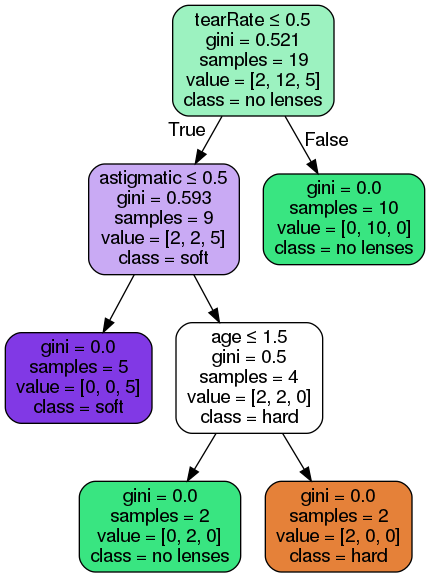

In [7]:
from sklearn.externals.six import StringIO
from sklearn import tree
from IPython.display import Image
import pydot

dot_data = StringIO()  
tree.export_graphviz(model, out_file=dot_data,  
                     feature_names=['age','prescript','astigmatic','tearRate'],  
                     class_names=target_name,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())
#graph[0].write_pdf("test.pdf")